In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only first two features for 2D visualization
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names[:2]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
classifiers = {
    'Linear SVM': SVC(kernel='linear', C=1.0, random_state=42),
    'Polynomial SVM': SVC(kernel='poly', degree=3, C=1.0, random_state=42),
    'RBF SVM': SVC(kernel='rbf', gamma=0.7, C=1.0, random_state=42),
    'Sigmoid SVM': SVC(kernel='sigmoid', gamma=0.1, C=1.0, random_state=42)
}

In [ ]:
results = {}
for name, clf in classifiers.items():
    # Train
    clf.fit(X_train_scaled, y_train)

    # Predict
    y_pred = clf.predict(X_test_scaled)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=target_names)

    # Store results
    results[name] = {
        'classifier': clf,
        'accuracy': accuracy,
        'confusion_matrix': cm,
        'report': report
    }

# Print results
for name, result in results.items():
    print(f"\n{name}")
    print("Accuracy:", result['accuracy'])
    print("Confusion Matrix:\n", result['confusion_matrix'])
    print("Classification Report:\n", result['report'])


Linear SVM
Accuracy: 0.7333333333333333
Confusion Matrix:
 [[19  0  0]
 [ 0  7  6]
 [ 0  6  7]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.54      0.54      0.54        13
   virginica       0.54      0.54      0.54        13

    accuracy                           0.73        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.73      0.73      0.73        45


Polynomial SVM
Accuracy: 0.7555555555555555
Confusion Matrix:
 [[19  0  0]
 [ 0 11  2]
 [ 0  9  4]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.55      0.85      0.67        13
   virginica       0.67      0.31      0.42        13

    accuracy                           0.76        45
   macro avg       0.74      0.72      0.70        45
weighted avg       0.77      0.76      0.74    

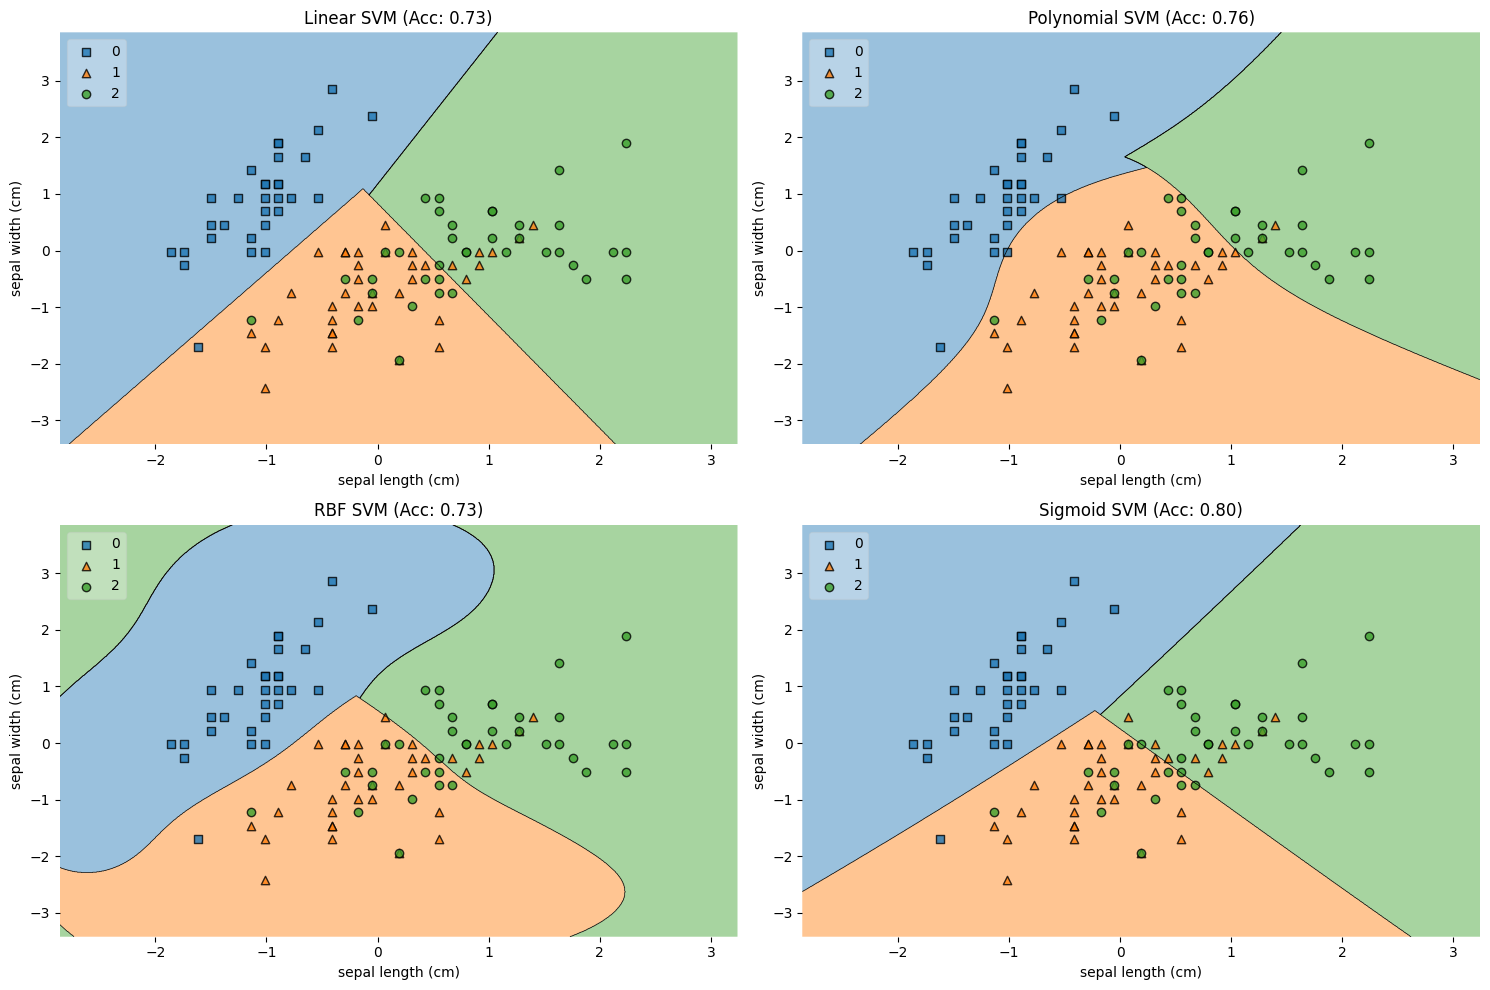

In [ ]:
plt.figure(figsize=(15, 10))
for i, (name, result) in enumerate(results.items()):
    plt.subplot(2, 2, i + 1)
    plot_decision_regions(X_train_scaled, y_train, clf=result['classifier'], legend=2)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(f'{name} (Acc: {result["accuracy"]:.2f})')
plt.tight_layout()
plt.show()

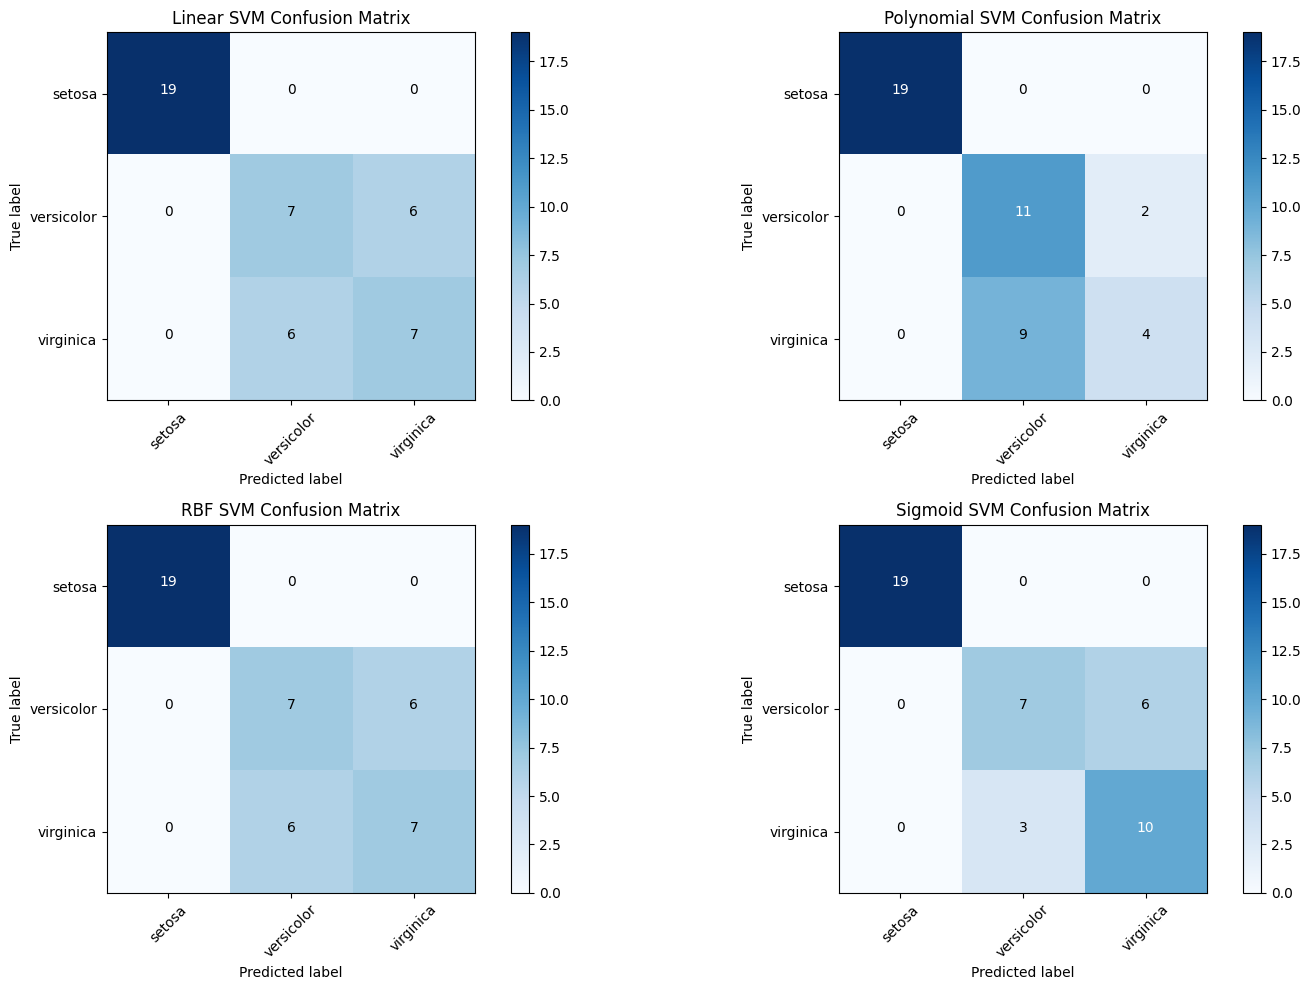

In [ ]:
plt.figure(figsize=(15, 10))
for i, (name, result) in enumerate(results.items()):
    plt.subplot(2, 2, i + 1)
    cm = result['confusion_matrix']
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'{name} Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)

    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j]), ha="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

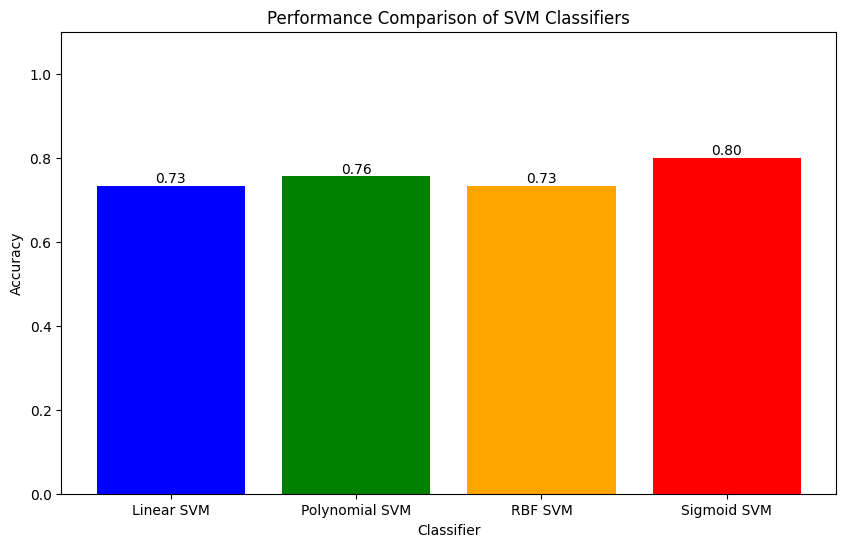

In [ ]:
accuracies = [result['accuracy'] for result in results.values()]
plt.figure(figsize=(10, 6))
bars = plt.bar(results.keys(), accuracies, color=['blue', 'green', 'orange', 'red'])  # fixed variable name
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Performance Comparison of SVM Classifiers')
plt.ylim(0, 1.1)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{height:.2f}', ha='center', va='bottom')
plt.show()

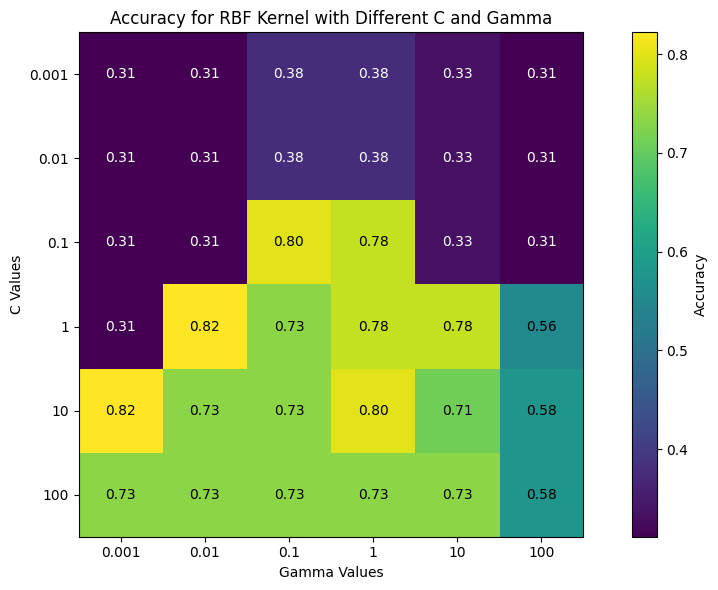

In [ ]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
gamma_values = [0.001, 0.01, 0.1, 1, 10, 100]

accuracies = np.zeros((len(C_values), len(gamma_values)))

for i, C in enumerate(C_values):
    for j, gamma in enumerate(gamma_values):
        clf = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        accuracies[i, j] = accuracy_score(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(10, 6))
plt.imshow(accuracies, interpolation='nearest', cmap='viridis')
plt.title("Accuracy for RBF Kernel with Different C and Gamma")
plt.xlabel("Gamma Values")
plt.ylabel("C Values")
plt.colorbar(label='Accuracy')

# Annotate values
for i in range(len(C_values)):
    for j in range(len(gamma_values)):
        plt.text(j, i, f"{accuracies[i, j]:.2f}",
                 ha='center', va='center',
                 color='white' if accuracies[i, j] < 0.5 else 'black')

# Tick labels
plt.xticks(np.arange(len(gamma_values)), gamma_values)
plt.yticks(np.arange(len(C_values)), C_values)
plt.tight_layout()
plt.show()